In [1]:
import torch
import torchvision

tabu1 = []
tabu2 = []

n_epochs = 10
batch_size_train = 32
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [2]:

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_test, shuffle=True)

print(train_loader)
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)


torch.Size([32, 1, 28, 28])


In [385]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [386]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./cifar10_dataset', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.49137255, 0.48235294, 0.44666667), (0.24705882, 0.24352941, 0.26156863))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./cifar10_dataset', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.49137255, 0.48235294, 0.44666667), (0.24705882, 0.24352941, 0.26156863))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


Files already downloaded and verified
Files already downloaded and verified
torch.Size([512, 3, 32, 32])


In [387]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='train', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='test', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [388]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)



In [3]:
train_size = int(0.8 * len(train_loader.dataset))
test_size = len(train_loader.dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_loader.dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test,
                                                shuffle=False)

In [4]:
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in train_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

train_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])
test_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])

print(mean)
print(std)

tensor([0.2863])
tensor([0.3206])


In [5]:
def initMatrix(size, append_with):
    ary = []
    for i in range(0, size):
        ary.append(append_with)
    return ary


In [6]:
tabu1 = initMatrix(4096, 1)
tabu2 = initMatrix(4096, 1)

layer1_dropout = 0.5
layer2_dropout = 0.5

layer1_diff = 1.0-layer1_dropout
layer2_diff = 1.0-layer2_dropout

#tabu3 = initMatrix(512)

In [393]:
from torch.nn.modules import Module
from torch.nn import functional as F
from torch._jit_internal import weak_module, weak_script_method

class Dropout(Module):
    def __init__(self, p=0.5, inplace=False):
        super(Dropout, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        self.inplace = inplace
        print("Updated Dropout: " + str(p))

    def forward(self, input):
        varTemp = F.dropout(input, self.p, self.training, self.inplace)
        return varTemp

    def __repr__(self):
        inplace_str = ', inplace' if self.inplace else ''
        return self.__class__.__name__ + '(' \
            + 'p=' + str(self.p) \
            + inplace_str + ')'
      
class MyLinear(torch.nn.Linear):
    def __init__(self, in_feats, out_feats, drop_p, t, bias=True):
        super(MyLinear, self).__init__(in_feats, out_feats, bias=bias)
        self.masker = Dropout(p=drop_p)
        self.tabu = t
        self.firstItr = True
        self.historial_tabu_count = initMatrix(4096, 0)

    def forward(self, input):
       
        masked_weight = self.masker(self.weight)
        output = F.linear(input, masked_weight, self.bias)
        
        if self.firstItr == True:
            
            self.firstItr = False
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    self.tabu[i] = 0
        else:
            
            temp_tabu = initMatrix(len(output[0]), 1)
            
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    temp_tabu[i] = 0

            for i in range(0, len(output[0])):
                if (self.tabu[i] == 0 and temp_tabu[i] == 0):
                    # Neuron will be dropped
                    self.historial_tabu_count[i] = self.historial_tabu_count[i] + 1
                    
                    if self.historial_tabu_count[i] > 2:
                        self.tabu[i] = 1
                        output[0][i] = input[0][i]
                        self.historial_tabu_count[i] = 0
                    else:
                        self.tabu[i] = temp_tabu[i]

        return output
    
    def updateCurrentDropout(self, m):
        tempM = '{:.2f}'.format(m)
        self.masker = Dropout(p=float(tempM))  
        


In [394]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
       
        # define the layers and their sizes, turn off bias
        
        self.fc1 = nn.Linear(3072, 4096)
       
        self.aD1 = MyLinear(4096, 4096, layer1_dropout, tabu1) #nn.Dropout(0.5) # # #      
        
        #self.d2 = nn.Dropout(0.5)
        #self.aD2 = MyLinear(1024, 1024, layer2_dropout, tabu2) 
        #self.fc2 = nn.Linear(1024, 1024)
        #self.d2 = Dropout(0.5) 
        #self.fc3 = nn.Linear(1024, 1024)
        
        #For CIFAR-10
        #self.d3 = Dropout(0.3) 
        #self.fc3_1 = nn.Linear(512, 256)
        
        self.fc4 = nn.Linear(4096, 10)
        

    def forward(self, x):
        x = x.view(-1, 3072)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.aD1(x))
        #x = F.relu(self.dT(x))
        #x = F.relu(self.aD2(x))
        
        #x = F.relu(self.d2(x))
        #x = F.relu(self.fc3(x))
        
        # for CIFAR-10
        #x = F.relu(self.d3(x))
        #x = F.relu(self.fc3_1(x))
        x = self.fc4(x)
        return F.log_softmax(x)
      
    def updateDropout(self, m):
        self.aD1.updateCurrentDropout(m)
        #self.aD2.updateCurrentDropout(m)

In [395]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

Updated Dropout: 0.5


In [396]:
avg_train_loss = []
avg_train_counter = []
avg_test_loss = []
avg_test_counter = []
test_accuracy_list = []

test_losses = []
test_counter = []

epoch_number = 0
train_avg_loss = 0
test_avg_loss = 0

In [397]:
# 0 means negative
# 1 means positive
loss_type = 0
previous_loss = 100.0
sign_manipulator = 1

pos_inc = 0
neg_inc = 0

In [398]:
def train(epoch, layer1_dropout):
  
    train_losses = []
    train_counter = []
    
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            #torch.save(network.state_dict(), './results/cifar10_with_adaptive_model.pth')
            #torch.save(optimizer.state_dict(), './results/cifar10_with_adaptive_optimizer.pth')
            #test(epoch, False)
            
    sum = 0.0
    for loss in train_losses:
        sum = sum + loss
    
    current_loss = sum / len(train_losses)
    
    avg_train_loss.append(current_loss)
    network.updateDropout(layer1_dropout)
    return current_loss

In [399]:
def test(epoch):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
        #iterator = iter(test_loader)
        #data, target= iterator.next() 
        
            examples = enumerate(val_loader)
            batch_idx, (example_data, example_targets) = next(examples)  
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(val_loader.dataset)
    avg_test_loss.append(test_loss)
    test_counter.append((batch_idx*64) + ((epoch-1)*len(val_loader.dataset)))
    test_accuracy_list.append(100. * correct / len(val_loader.dataset))
    
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))
    return test_loss
   

In [400]:
init_dropout = 0.5
loss_counter = 0
sum_loss = 0
firstItr = True

for epoch in range(1, n_epochs + 1):
                             
    train_loss = train(epoch, abs(layer1_dropout))
    val_loss = test(epoch)
    
    if(firstItr == True):
        previous_loss = val_loss
        firstItr = False
    
    print("Train Loss: " + str(train_loss))
    print("Val Loss: " + str(val_loss))
    
    if(val_loss >= train_loss):
        
        print("Previous Loss: " + str(previous_loss))
        diff = val_loss - train_loss
        
        if(diff > previous_loss):
            layer1_dropout = layer1_dropout - 0.05
            if(layer1_dropout < 0 or layer1_dropout > 0.9):
                layer1_dropout = init_dropout
                init_dropout = init_dropout - 0.1
                if(init_dropout < 0.0):
                    init_dropout = 0.5
                    
        if(loss_counter < 3):
            sum_loss = sum_loss + diff
            loss_counter = loss_counter + 1
        if(loss_counter == 3):
            previous_loss = sum_loss / 3
            loss_counter = 0
            sum_loss = 0
            print("Previous Loss Updated")
        
        print("Diff: " + str(diff))
              

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/40000 (0%)]	Loss: 2.307273
Train Epoch: 1 [5120/40000 (13%)]	Loss: 2.245359
Train Epoch: 1 [10240/40000 (25%)]	Loss: 2.205729
Train Epoch: 1 [15360/40000 (38%)]	Loss: 2.160002
Train Epoch: 1 [20480/40000 (51%)]	Loss: 2.142907
Train Epoch: 1 [25600/40000 (63%)]	Loss: 2.090257
Train Epoch: 1 [30720/40000 (76%)]	Loss: 2.085212
Train Epoch: 1 [35840/40000 (89%)]	Loss: 2.055532
Updated Dropout: 0.5
Test set: Avg. loss: 2.0336, Accuracy: 2997/10000 (29%)

Train Loss: 2.161533832550049
Val Loss: 2.033576025390625
Train Epoch: 2 [0/40000 (0%)]	Loss: 2.066922
Train Epoch: 2 [5120/40000 (13%)]	Loss: 2.010533
Train Epoch: 2 [10240/40000 (25%)]	Loss: 2.039568
Train Epoch: 2 [15360/40000 (38%)]	Loss: 1.986106
Train Epoch: 2 [20480/40000 (51%)]	Loss: 1.978395
Train Epoch: 2 [25600/40000 (63%)]	Loss: 1.957860
Train Epoch: 2 [30720/40000 (76%)]	Loss: 1.934228
Train Epoch: 2 [35840/40000 (89%)]	Loss: 1.928351
Updated Dropout: 0.5
Test set: Avg. loss: 1.9159, Accuracy: 3363/10000 (33%)

KeyboardInterrupt: 

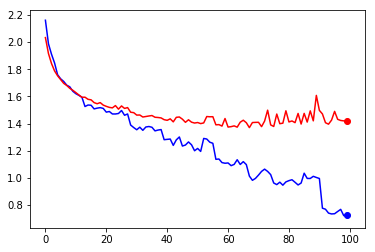

In [382]:
import matplotlib.pyplot as plt

fig = plt.figure()

final_train_counter = []
final_train_losses = []
final_test_counter = []
final_test_losses = []

for i in range(0, n_epochs):
    final_train_counter.append(i)

"""
for i in range(0, len(avg_train_loss)-1, 30):
    index = int(i/10)
    final_train_counter.append(train_counter[i])
    final_train_losses.append((train_losses[i] + train_losses[i+1]) / 2)
    final_test_counter.append(train_counter[i])
    final_test_losses.append((test_losses[i] + test_losses[i+1]) / 2)

final_train_counter.append(train_counter[len(train_counter)-1]) 
final_train_losses.append(train_losses[len(train_counter)-1])
final_test_counter.append(train_counter[len(train_counter)-1])
final_test_losses.append(test_losses[len(train_counter)-1])    
    
plt.plot(len(avg_train_loss), avg_train_loss, color='blue')
plt.scatter(avg_train_loss[-1], avg_train_loss[-1], color='blue')
plt.plot(len(avg_test_losses), avg_test_losses, color='red')
plt.scatter(avg_test_losses[-1], avg_test_losses[-1], color='red')

# print(len(test_counter))
# print(len(test_losses))

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
"""

plt.plot(final_train_counter, avg_train_loss, color='blue')
plt.scatter(final_train_counter[-1], avg_train_loss[-1], color='blue')
plt.plot(final_train_counter, avg_test_loss, color='red')
plt.scatter(final_train_counter[-1], avg_test_loss[-1], color='red')
# plt.plot(final_train_counter, test_accuracy_list, color='orange')

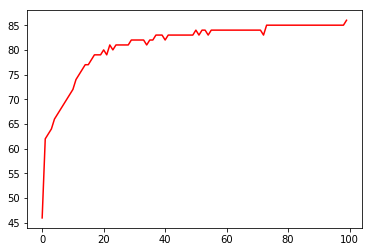

In [361]:
import matplotlib.pyplot as plt

fig = plt.figure()


last_acc = []
last_counter = []
index = 0
for acc in range(0, len(test_accuracy_list)) :
    last_acc.append(test_accuracy_list[acc])
    last_counter.append(final_train_counter[index])
    index = index + 1

plt.plot(last_counter, last_acc, color='red')


In [201]:
import matplotlib.pyplot as plt
import plotter

acc1 = plotter.SavedAccuracy(name='mnist64_adaptive_tabu_acc.pkl')
acc1.saveGraph(last_acc, last_counter)
#a, c = acc1.loadGraph()
#plt.plot(c, a, color='red')


/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


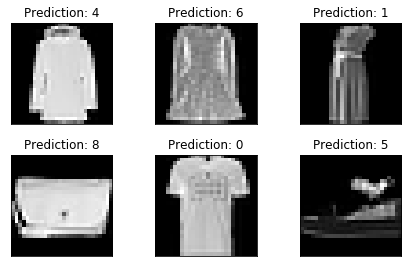

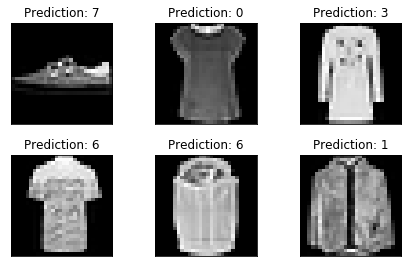

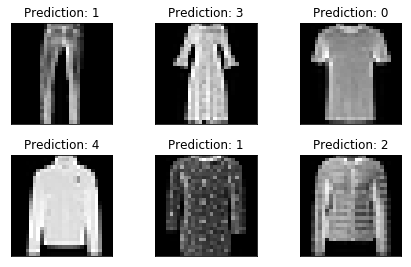

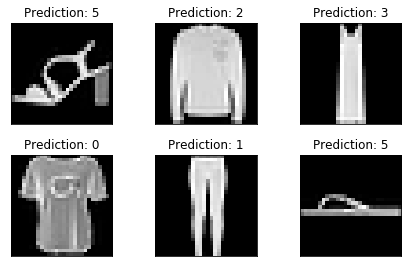

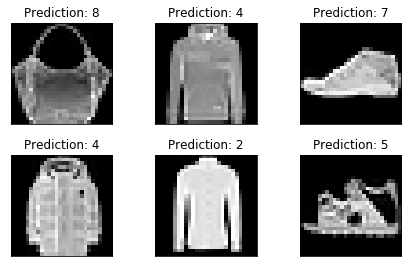

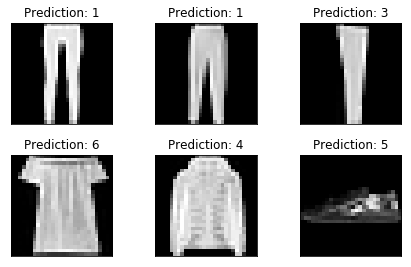

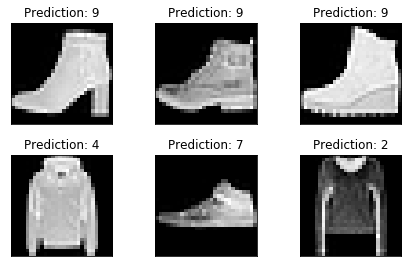

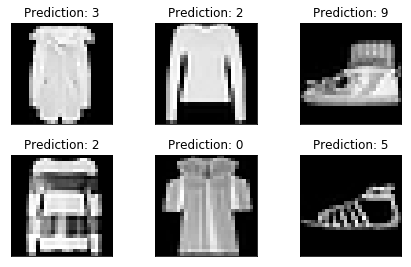

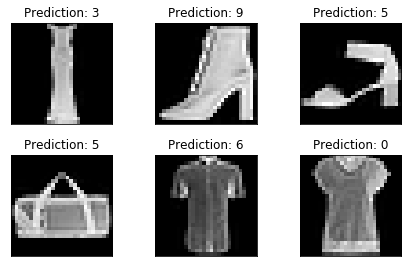

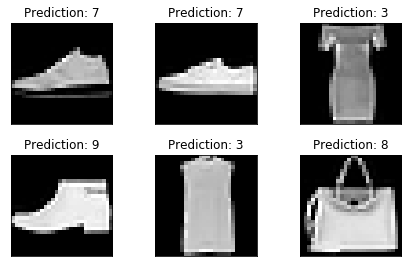

In [207]:
examples = enumerate(test_loader)
for i in range(0, 10):
    batch_idx, (example_data, example_targets) = next(examples)
  
    with torch.no_grad():
        output = network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            plt.xticks([])
            plt.yticks([])


In [221]:
# Reloading a already saved model
'''
import matplotlib.pyplot as plt

continued_network = Net()
continued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,
                                momentum=momentum)

network_state_dict = torch.load('./results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

examples = enumerate(test_loader)
for i in range(0, 2):
    batch_idx, (example_data, example_targets) = next(examples)

    with torch.no_grad():
        output = continued_network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            
            plt.xticks([])
            plt.yticks([])
            
'''

'\nimport matplotlib.pyplot as plt\n\ncontinued_network = Net()\ncontinued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,\n                                momentum=momentum)\n\nnetwork_state_dict = torch.load(\'./results/model.pth\')\ncontinued_network.load_state_dict(network_state_dict)\n\noptimizer_state_dict = torch.load(\'./results/optimizer.pth\')\ncontinued_optimizer.load_state_dict(optimizer_state_dict)\n\nexamples = enumerate(test_loader)\nfor i in range(0, 2):\n    batch_idx, (example_data, example_targets) = next(examples)\n\n    with torch.no_grad():\n        output = continued_network(example_data)\n\n        fig = plt.figure()\n        for i in range(6):\n            plt.subplot(2,3,i+1)\n            plt.tight_layout()\n            plt.imshow(example_data[i][0], cmap=\'gray\', interpolation=\'none\')\n            plt.title("Prediction: {}".format(\n                output.data.max(1, keepdim=True)[1][i].item()))\n            \n            plt.xticks

'\nimport matplotlib.pyplot as plt\n\ncontinued_network = Net()\ncontinued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,\n                                momentum=momentum)\n\nnetwork_state_dict = torch.load(\'./results/model.pth\')\ncontinued_network.load_state_dict(network_state_dict)\n\noptimizer_state_dict = torch.load(\'./results/optimizer.pth\')\ncontinued_optimizer.load_state_dict(optimizer_state_dict)\n\nexamples = enumerate(test_loader)\nfor i in range(0, 2):\n    batch_idx, (example_data, example_targets) = next(examples)\n\n    with torch.no_grad():\n        output = continued_network(example_data)\n\n        fig = plt.figure()\n        for i in range(6):\n            plt.subplot(2,3,i+1)\n            plt.tight_layout()\n            plt.imshow(example_data[i][0], cmap=\'gray\', interpolation=\'none\')\n            plt.title("Prediction: {}".format(\n                output.data.max(1, keepdim=True)[1][i].item()))\n            \n            plt.xticks